<center><h1>Logistic Regression (Binary)</h1></center>

<center><h2>Coded by Anirudh Edpuganti</h2></center>
<center>CB.EN.U4AIE20005</center>

## Create a complete document on Logistic Regression

### Model Representation

The logistic regression model can be represented mathematically as:

$$ P(y=1|x_1,x_2,...,x_n) = \frac{1}{1+e^{-z}} $$

where, \
$P(y=1|x_1,x_2,...,x_n)$ is the probability that the dependent variable (y) is 1 given the values of the independent variables (x1, x2,...,xn) \
$z$ is the linear combination of the independent variables and their coefficients, given by:
$$ z = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n $$
$ b_1 - b_n $ are the weights given to the input features $ x_1 - x_n $ respectively. $b_0$ is the intercept.

We see that everything is similar except giving the output to sigmoid function to compute the probability and classify.


### Cost Function

The cost function for logistic regression is defined as:

$$ L(\boldsymbol{b}) = -\frac{1}{m} \Sigma_{i=1}^m [y_i log(\hat{y_i}) + (1-y_i)log(1-\hat{y_i})] $$

This is also called as the logistic loss function or the cross-entropy loss function.

where:

$m$ is the number of training examples \
$\boldsymbol{b}$ is the vector of coefficients for the independent variables \
$y_{i}$ is the true label for the $i$-th training example \
$\hat{y}_{i}$ is the predicted probability for the $i$-th training example 

The first term in the cost function measures the error when the true label is 1, and the second term measures the error when the true label is 0. When the predicted probability $\hat{y}_{i}$ is close to the true label $y_{i}$, the cost function will be small. However, when the predicted probability is far from the true label, the cost function will be large.

The goal of logistic regression is to find the set of coefficients $\boldsymbol{b}$ that minimize the cost function $J(\boldsymbol{b})$. We do this using optimization techniques such as gradient descent which was explained in Linear Regression.

### Sigmoid function

Sigmoid function is used to model the relationship between the independent variables and the dependent variable. 

As discussed in the model representation, sigmoid function is as follows:

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

where $z$ is a linear combination of the independent variables and their coefficients:
$$ z = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n $$

The sigmoid function takes the input value $z$ and maps it to a value between 0 and 1, which represents the probability that the dependent variable is 1 given the values of the independent variables. When $z$ is positive, the sigmoid function outputs a value closer to 1, and when $z$ is negative, the sigmoid function outputs a value closer to 0.

The sigmoid function has an S-shaped curve, which allows it to model nonlinear relationships between the independent variables and the dependent variable. In logistic regression, the goal is to find the set of coefficients $\beta_0, \beta_1, \beta_2, \cdots, \beta_n$ that maximize the likelihood of the observed data. The sigmoid function is used to compute the predicted probabilities, which are then compared to the true labels to compute the likelihood of the observed data.

Following is a visualization graph for sigmoid function.

![sigmoid](.\sigmoid.png)


### Type: Ordinal

Ordinal logistic regression is a statistical technique used for predicting an ordinal outcome variable, which has three or more levels that are ordered but not equally spaced. The technique is an extension of binary logistic regression, which is used for predicting binary outcomes.

In ordinal logistic regression, the dependent variable is modeled as a function of one or more independent variables using a cumulative probability function. The model estimates the probability that the dependent variable falls into each of the ordinal categories given the values of the independent variables. The coefficients in the model represent the log odds of being in a higher category compared to a lower category, given the values of the independent variables.

### Python program for Logistic regression (single and multi-variable; Binary, Multinomial and Ordinal )

#### load a classification data of your choice 
#### with and without (using linear regression model and sigmoid function) using an in-build python model.
####  Train the model with 75% of total data and do the performance evaluation of the model using the remaining 25%(give the measures: Confusion Matrix, Accuracy, Precision, Recall etc.)
#### Draw a performance plot of the logistic regression model(% of training data vs Accuracy)


In [84]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt

#### Ordinal Logistic Regression

In [85]:


# Load the Iris dataset
iris = load_iris()
X = iris.data
# Encode the target variable as ordinal values
le = LabelEncoder()
y = le.fit_transform(iris.target)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Train an ordinal logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# # Convert predicted ordinal values back to categorical labels
# y_pred_labels = le.inverse_transform(y_pred)
print(y_pred.shape)
print(y_test.shape)
cm = confusion_matrix(y_test, y_pred)
# Compute the accuracy, precision, recall, and F1 score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Confusion matrix:\n", cm)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)


(38,)
(38,)
Confusion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


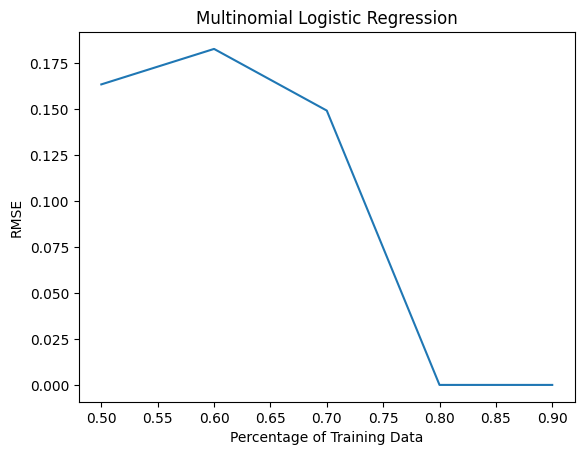

In [86]:
# Define the percentages of training data
train_percentages = [0.5, 0.6,0.7,0.8,0.9]

# Initialize an empty list to store the RMSE for each percentage
rmse_scores = []

# Loop over the percentages and fit the model
for train_percentage in train_percentages:
    X = iris.data
    # Encode the target variable as ordinal values
    le = LabelEncoder()
    y = le.fit_transform(iris.target)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage, random_state=42)
    
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the RMSE for this percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Plot the results
plt.plot(train_percentages, rmse_scores)
plt.xlabel('Percentage of Training Data')
plt.ylabel('RMSE')
plt.title('Multinomial Logistic Regression')
plt.show()